# LAB 3 MOS: Newton Raphson y Gradiente Descendente

- Samuel Augusto Hernandez 202213772
- Tomas Alberto Rodriguez 2022128686

## Problema 1: Newton-Raphson en 2D para Polinomios Cúbicos

### Implementación algoritmo Newton-Raphson (1 dimensión)


Calculando para x0=-6 y alpha=0.6
La raíz aproximada es: -1.62
El punto es un máximo local.

Calculando para x0=-6 y alpha=1.0
La raíz aproximada es: -1.62
El punto es un máximo local.

Calculando para x0=-4 y alpha=0.6
La raíz aproximada es: -1.62
El punto es un máximo local.

Calculando para x0=-4 y alpha=1.0
La raíz aproximada es: -1.62
El punto es un máximo local.

Calculando para x0=-2 y alpha=0.6
La raíz aproximada es: -1.62
El punto es un máximo local.

Calculando para x0=-2 y alpha=1.0
La raíz aproximada es: -1.62
El punto es un máximo local.

Calculando para x0=0 y alpha=0.6
La raíz aproximada es: -1.62
El punto es un máximo local.

Calculando para x0=0 y alpha=1.0
La raíz aproximada es: -1.62
El punto es un máximo local.

Calculando para x0=2 y alpha=0.6
La raíz aproximada es: 3.84
El punto es un mínimo local.

Calculando para x0=2 y alpha=1.0
La raíz aproximada es: 3.84
El punto es un mínimo local.

Calculando para x0=4 y alpha=0.6
La raíz aproximada es: 3.84
El punto es un

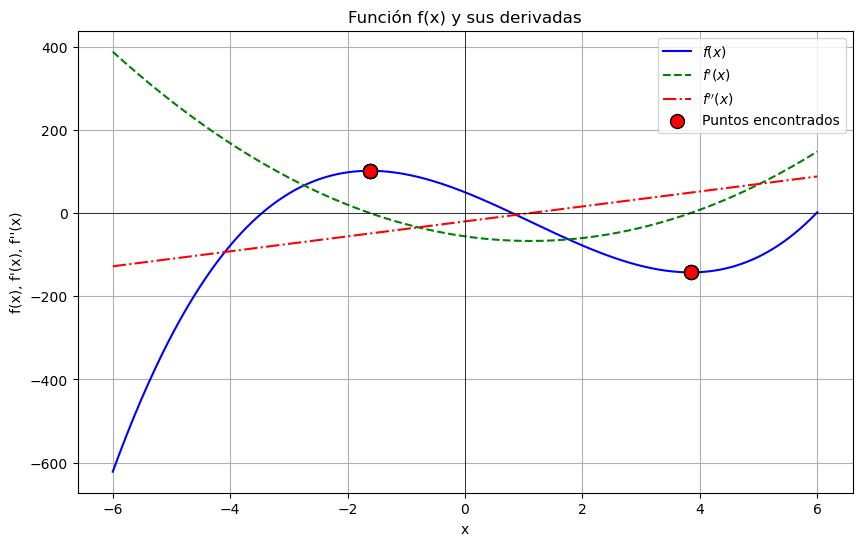

In [43]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.symbols('x')
a = 3
b = 10
c = 56
d = 50
# Función de tercer grado
f = a*x**3 - b*x**2 - c*x + d

# f'(x) Derivada
f_prima = sp.diff(f,x)
# f''(x) Segunda derivada
f_doble_prima = sp.diff(f_prima, x)

# Funciones numericas
f_func = sp.lambdify(x, f, 'numpy')
f_derivada = sp.lambdify(x, f_prima, 'numpy')
f_segunda_derivada = sp.lambdify(x, f_doble_prima, 'numpy')

# Algoritmo de Newton-Raphson
def newton_raphson(f_prime_func, f_double_prime_func, x0, alpha=1.0, tol=1e-6, max_iter=100):
    x_k = x0
    # Iteraciones con un maximo
    for k in range(max_iter):
        # Calcular gradiente
        grad_f = f_prime_func(x_k)
        # Calcular hessiana
        hess_f = f_double_prime_func(x_k) # Como es una dimension es la segunda derivada
        
        # Verificar si la segunda derivada es cercana a cero
        if abs(hess_f) < 1e-12:
            print("La Hessiana es muy pequeña o cero, el método falla.")
            return None
        
        # Calcular dk
        d_k = -grad_f / hess_f
        
        # Actualizar x_k
        x_k = x_k + alpha * d_k
        
        # Verificar la condición de parada
        if abs(grad_f) < tol:
            return x_k
    
    print("Se alcanzó el número máximo de iteraciones.")
    return x_k

def caracterizacion_extremo(f_double_prime_func, x_k):
    # Evaluar la segunda derivada en el punto
    f_double_prime_at_root = f_double_prime_func(x_k)
    
    # Signo de segunda derivada
    if f_double_prime_at_root > 0:
        return "El punto es un mínimo local."
    elif f_double_prime_at_root < 0:
        return "El punto es un máximo local."
    else:
        return "El punto es un punto de silla (segunda derivada es cero)."

# Graficar la función, sus derivadas y los puntos
def graficar_funcion(f_func, f_derivada, f_segunda_derivada, puntos_encontrados, rango):
    x_vals = np.linspace(-rango, rango, 400)
    # Valores de función, derivada y segunda derivada
    f_vals = f_func(x_vals)
    f_prime_vals = f_derivada(x_vals)
    f_double_prime_vals = f_segunda_derivada(x_vals)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, f_vals, label='$f(x)$', color='blue')
    plt.plot(x_vals, f_prime_vals, label="$f'(x)$", linestyle='--', color='green')
    plt.plot(x_vals, f_double_prime_vals, label="$f''(x)$", linestyle='-.', color='red')
    
    # Añadir los puntos encontrados en la gráfica
    if puntos_encontrados:
        puntos_encontrados = np.array(puntos_encontrados)
        plt.scatter(puntos_encontrados, f_func(puntos_encontrados), color='red', zorder=5, label='Puntos encontrados', s=100, edgecolor='black')
    
    # Etiquetas
    plt.title("Función f(x) y sus derivadas")
    plt.xlabel('x')
    plt.ylabel('f(x), f\'(x), f\'\'(x)')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.legend()
    plt.grid(True)
    plt.show()



# Experimentar con diferentes valores iniciales en el intervalo [-6, 6]
valores_iniciales = [-6, -4, -2, 0, 2, 4, 6]
valores_alpha = [0.6, 1.0]  # Probar diferentes valores de alpha
puntos_encontrados = []
for x0 in valores_iniciales:
    for alpha in valores_alpha:
        print(f"\nCalculando para x0={x0} y alpha={alpha}")
        x_k = newton_raphson(f_derivada, f_segunda_derivada, x0, alpha=alpha)
        if x_k is not None:
            print(f"La raíz aproximada es: {round(x_k, 2)}")
            print(caracterizacion_extremo(f_segunda_derivada, x_k))
        if x_k not in puntos_encontrados:
            puntos_encontrados.append(x_k)

graficar_funcion(f_func, f_derivada, f_segunda_derivada, puntos_encontrados, 6)





### Analisis de comportamiento de convergencia

En este caso, se realizaron múltiples ejecuciones del algoritmo de Newton-Raphson con diferentes valores iniciales X_0 dentro del intervalo [-6, 6] y diferentes valores para alpha (0.6 y 1.0). La raíz encontrada en cada ejecución es consistente en los valores de X_0 y alpha, lo que sugiere que el algoritmo ha convergido correctamente en cada caso. 

Los puntos iniciales más cercanos a los puntos críticos de la función f(x) (es decir, los máximos y mínimos locales) convergen a esos puntos. 

- Para valores iniciales entre -6 y 0, la raíz encontrada se aproxima al maximo local -1,62
- Para valores iniciales entre 2 y 6, la raíz encontrada se aproxima al mínimo local 3,84

## Problema 2: Análisis de Extremos Locales y Globales


Calculando para x0=-3 y alpha=0.6
La raíz aproximada es: -2.08
El punto es un máximo local.

Calculando para x0=-3 y alpha=1.0
La raíz aproximada es: -2.08
El punto es un máximo local.

Calculando para x0=-2 y alpha=0.6
La raíz aproximada es: -2.08
El punto es un máximo local.

Calculando para x0=-2 y alpha=1.0
La raíz aproximada es: -2.08
El punto es un máximo local.

Calculando para x0=-1 y alpha=0.6
La raíz aproximada es: -0.68
El punto es un mínimo local.

Calculando para x0=-1 y alpha=1.0
La raíz aproximada es: -0.68
El punto es un mínimo local.

Calculando para x0=0 y alpha=0.6
La Hessiana es muy pequeña o cero, el método falla.

Calculando para x0=0 y alpha=1.0
La Hessiana es muy pequeña o cero, el método falla.

Calculando para x0=1 y alpha=0.6
La raíz aproximada es: 0.68
El punto es un máximo local.

Calculando para x0=1 y alpha=1.0
La raíz aproximada es: 0.68
El punto es un máximo local.

Calculando para x0=2 y alpha=0.6
La raíz aproximada es: 2.08
El punto es un mínimo loca

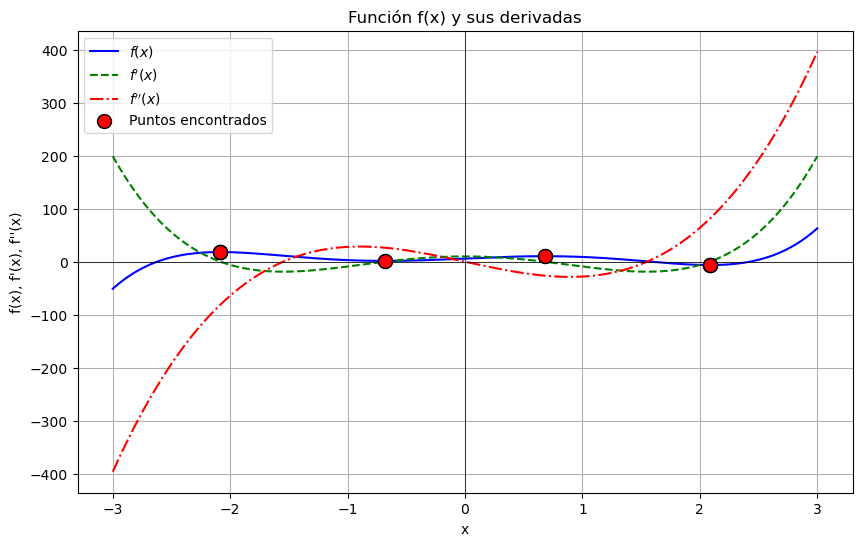

In [47]:
x = sp.symbols('x')
a = 1
b = 0
c = -8
d = 0
e = 10
g = 6
# Función de tercer grado
f2 = a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + g

# f'(x) Derivada
f_prima = sp.diff(f2,x)
# f''(x) Segunda derivada
f_doble_prima = sp.diff(f_prima, x)

# Funciones numericas
f_func = sp.lambdify(x, f2, 'numpy')
f_derivada = sp.lambdify(x, f_prima, 'numpy')
f_segunda_derivada = sp.lambdify(x, f_doble_prima, 'numpy')

# Experimentar con diferentes valores iniciales en el intervalo [-4, 4]
valores_iniciales = [-3, -2, -1, 0, 1, 2, 3]
valores_alpha = [0.6, 1.0]  # Probar diferentes valores de alpha
puntos_encontrados = []
for x0 in valores_iniciales:
    for alpha in valores_alpha:
        print(f"\nCalculando para x0={x0} y alpha={alpha}")
        x_k = newton_raphson(f_derivada, f_segunda_derivada, x0, alpha=alpha)
        if x_k is not None:
            print(f"La raíz aproximada es: {round(x_k, 2)}")
            print(caracterizacion_extremo(f_segunda_derivada, x_k))
        if x_k not in puntos_encontrados and x_k is not None:
            puntos_encontrados.append(x_k)


graficar_funcion(f_func, f_derivada, f_segunda_derivada, puntos_encontrados, 3)

## Problema 3: Newton-Raphson Multidimensional

## Problema 4: Gradiente Descendente en Optimización

## Problema 5: Descenso de Gradiente y Descenso de Gradiente Basado en Momento